In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the number of classes and attributes
num_classes = 3
num_attributes = 1

# Initialize lists to store data and labels
data = []
labels = []

# Define the path to the main folder containing class folders
main_folder = 'D:\CS\GRAD\CHICK_t\object_tracking\Dataset'

# Iterate through each class folder
for class_id in range(1, num_classes + 1):
    class_folder = os.path.join(main_folder, str(class_id))
    
    # Iterate through each CSV file in the class folder
    for file_id in range(30):
        file_path = os.path.join(class_folder, f'{file_id}.csv')
        
        # Read the CSV file and extract the attribute values
        df = pd.read_csv(file_path)
        attribute_values = df.iloc[:1196, 0]  # Assuming attribute is in the first column
        
        # Add the attribute values to the data list
        data.extend(attribute_values)
        
        # Add the class label to the labels list
        labels.extend([class_id - 1] * len(attribute_values))  # Subtract 1 to make labels 0-based index

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Perform one-hot encoding on the labels
labels = pd.get_dummies(labels).values

# Reshape the data for LSTM input (samples, timesteps, features)
data = data.reshape(-1, 1, num_attributes)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, num_attributes)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(data, labels, epochs=30, batch_size=32)


In [41]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def load_data():
    # Define the number of classes and attributes
    num_classes = 3
    num_attributes = 1

    # Initialize lists to store data and labels
    data = []
    labels = []

    # Define the path to the main folder containing class folders
    main_folder = 'D:\CS\GRAD\CHICK_t\object_tracking\Dataset'

    # Iterate through each class folder
    for class_id in range(1, num_classes + 1):
        class_folder = os.path.join(main_folder, str(class_id))
        
        # Iterate through each CSV file in the class folder
        for file_id in range(30):
            file_path = os.path.join(class_folder, f'{file_id}.csv')
            
            # Read the CSV file and extract the attribute values
            df = pd.read_csv(file_path)
            attribute_values = df.iloc[:1196, 0]  # Assuming attribute is in the first column
            
            # Add the attribute values to the data list
            data.extend(attribute_values)
            
            # Add the class label to the labels list
            labels.extend([class_id - 1] * len(attribute_values))  # Subtract 1 to make labels 0-based index

    # Convert data and labels to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # Reshape the data for LSTM input (samples, timesteps, features)
    X_train = X_train.reshape(-1, 1, num_attributes)
    X_test = X_test.reshape(-1, 1, num_attributes)

    # Perform one-hot encoding on the labels
    y_train = pd.get_dummies(y_train).values
    y_test = pd.get_dummies(y_test).values

    return X_train, X_test, y_train, y_test

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def train_model(model, X_train, y_train, X_test, y_test):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

def save_model(model, model_path):
    model.save(model_path)
    print("Model saved successfully.")

def load_model(model_path):
    model = Sequential()
    model = model.load_weights(model_path)
    return model

def predict(model, test_data):
    return model.predict(test_data)

def main():
    # Load the data
    X_train, X_test, y_train, y_test = load_data()

    # Build the model
    input_shape = X_train.shape[1:]
    num_classes = y_train.shape[1]
    model = build_model(input_shape, num_classes)

    # Train the model
    train_model(model, X_train, y_train, X_test, y_test)

    # Save the trained model
    model_path = 'LSTM_4classes.h5'
    save_model(model, model_path)

    # Load the saved model
    loaded_model = load_model(model_path)

    # Perform predictions
    test_data = ...  # Provide your test data here
    predictions = predict(loaded_model, test_data)
    print(predictions)

if __name__ == '__main__':
    main()


Epoch 1/30
2689/2689 [==============================] - 11s 3ms/step - loss: 1.0257 - accuracy: 0.4702 - val_loss: 1.0088 - val_accuracy: 0.5025
Epoch 2/30
2689/2689 [==============================] - 7s 3ms/step - loss: 0.9953 - accuracy: 0.4863 - val_loss: 1.0016 - val_accuracy: 0.4479
Epoch 3/30
2689/2689 [==============================] - 7s 3ms/step - loss: 0.9919 - accuracy: 0.4859 - val_loss: 0.9905 - val_accuracy: 0.4742
Epoch 4/30
2689/2689 [==============================] - 7s 3ms/step - loss: 0.9892 - accuracy: 0.4911 - val_loss: 0.9953 - val_accuracy: 0.4715
Epoch 5/30
2689/2689 [==============================] - 7s 3ms/step - loss: 0.9875 - accuracy: 0.4917 - val_loss: 0.9879 - val_accuracy: 0.4913
Epoch 6/30
2689/2689 [==============================] - 7s 3ms/step - loss: 0.9868 - accuracy: 0.4911 - val_loss: 0.9827 - val_accuracy: 0.4927
Epoch 7/30
2689/2689 [==============================] - 7s 3ms/step - loss: 0.9861 - accuracy: 0.4931 - val_loss: 0.9853 - val_accuracy

ValueError: Unable to load weights saved in HDF5 format into a subclassed Model which has not created its variables yet. Call the Model first, then load the weights.

In [40]:
# import os
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Define the number of classes and attributes
# num_classes = 3
# num_attributes = 1

# # Initialize lists to store data and labels
# data = []
# labels = []

# # Define the path to the main folder containing class folders
# main_folder = 'D:\CS\GRAD\CHICK_t\object_tracking\Dataset'

# # Iterate through each class folder
# for class_id in range(1, num_classes + 1):
#     class_folder = os.path.join(main_folder, str(class_id))
    
#     # Iterate through each CSV file in the class folder
#     for file_id in range(30):
#         file_path = os.path.join(class_folder, f'{file_id}.csv')
        
#         # Read the CSV file and extract the attribute values
#         df = pd.read_csv(file_path)
#         attribute_values = df.iloc[:1196, 0].values  # Assuming attribute is in the first column
        
#         # Add the attribute values to the data list
#         data.append(attribute_values)
        
#         # Add the class label to the labels list
#         labels.append(class_id - 1)  # Subtract 1 to make labels 0-based index

# # Convert data and labels to numpy arrays
# data = np.array(data)
# labels = np.array(labels)

# # Perform one-hot encoding on the labels
# labels = pd.get_dummies(labels).values

# # Reshape the data for LSTM input (samples, timesteps, features)
# # data = data.reshape(-1, 1, num_attributes)
# # data = np.vstack(data)
# # # print(len(data))

# # # data = np.reshape(data, (90, 1, num_attributes))

# # # data= np.reshape(data,-1)
# # print(len(data))
# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(1, num_attributes)))
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(data, labels, epochs=30, batch_size=32)


Epoch 1/30


ValueError: in user code:

    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 1, 1195), found shape=(None, 1195)


In [19]:
d=[]
d.append(attribute_values)
# attribute_values
print(len(d[0]))

1195


In [14]:
print("Data size:", len(data))
print("Labels size:", len(labels))


Data size: 107550
Labels size: 90


3361/3361 [==============================] - 5s 1ms/step


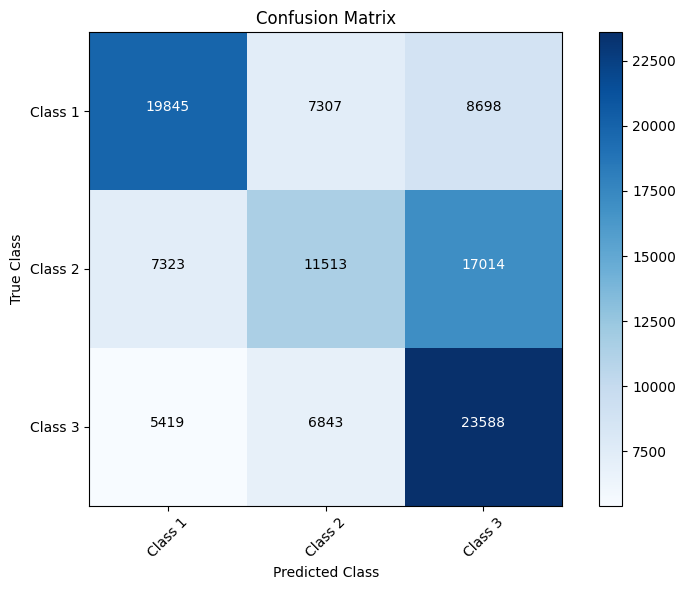

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the test data and labels
test_data = data  # Replace with your test data
test_labels = labels  # Replace with your test labels

# Predict the test data using the trained model
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
confusion = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)

# Convert confusion matrix to a DataFrame for better visualization
class_labels = [f'Class {i+1}' for i in range(num_classes)]
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix with numbers
plt.figure(figsize=(8, 6))
plt.imshow(confusion_df, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the confusion matrix
thresh = confusion_df.max().max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(confusion_df.iloc[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_df.iloc[i, j] > thresh else "black")

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()
